## Phase 4 (Modeling): Naive Bayes

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 7](https://data-science.training/kapitel-7/)
* Datum: 23.03.2023

Versionen 4 und 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 4, 5
version  = 5
# Modell-Abkürzung festlegen: nb = Naive Bayes
shortcut = 'nb'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Naive Bayes Methode auswählen
#  (KNIME: "XYZ Learner")
model = GaussianNB()
print(model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [10]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 409
* TP (True  Positives) : 276
* FN (False Negatives) : 66
* FP (False Positives) : 140

Gütemaße

* Genauigkeit  (Accuracy)    :   76,87 %
* Spezifität   (Specificity) :   74,48 %
* Sensitivität (Sensitivity) :   80,70 %
* Präzision    (Precision)   :   66,61 %
* Recall       (Recall)      :   80,70 %
* F-Maß        (F Score)     :   72,86 %
* AURC         (AURC)        :   83,78 %
* LogLoss      (LogLoss)     :    1,021

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  75,03 %


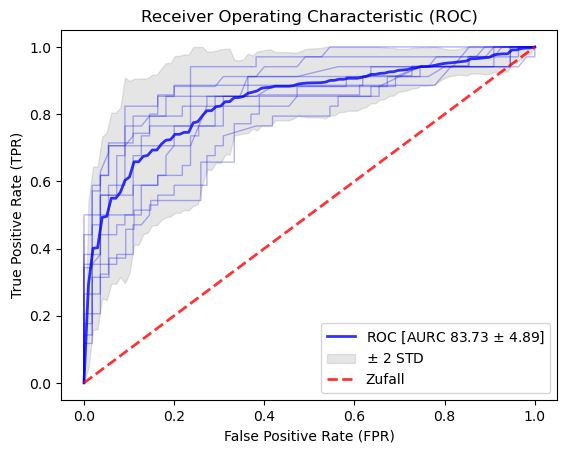

In [11]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [12]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

GaussianNB()

In [13]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

## Ergebnisse

#### Version 4 (Boolean bzw. Int)

Confusion Matrix

* TN (True  Negatives) : 433
* TP (True  Positives) : 261
* FN (False Negatives) : 81
* FP (False Positives) : 116

Gütemaße

* Genauigkeit  (Accuracy)    :   77,89 %
* Spezifität   (Specificity) :   78,85 %
* Sensitivität (Sensitivity) :   76,30 %
* Präzision    (Precision)   :   69,51 %
* Recall       (Recall)      :   76,30 %
* F-Maß        (F Score)     :   72,59 %
* AURC         (AURC)        :   83,20 %
* LogLoss      (LogLoss)     :    1,021

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  75,80 %

#### Version 5 (Float)

Confusion Matrix

* TN (True  Negatives) : 409
* TP (True  Positives) : 276
* FN (False Negatives) : 66
* FP (False Positives) : 140

Gütemaße

* Genauigkeit  (Accuracy)    :   76,87 %
* Spezifität   (Specificity) :   74,48 %
* Sensitivität (Sensitivity) :   80,70 %
* Präzision    (Precision)   :   66,61 %
* Recall       (Recall)      :   80,70 %
* F-Maß        (F Score)     :   72,86 %
* AURC         (AURC)        :   83,78 %
* LogLoss      (LogLoss)     :    1,021

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  75,03 %
